<a href="https://colab.research.google.com/github/Ashfak344/Machine-Learning-Projects/blob/main/CNN-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


Here I am going to import necessary libraries in order to train my model.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator




C:\Users\latif\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Defining constants
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32
NUM_CLASSES = 3


Here I have defined the image size, batch size and the number of classes as I am using three datasets including myself.

In [3]:
# Defining paths to my datasets
base_dir = 'Downloads/Assessment 2 CNN Project'
train_data_dir = os.path.join(base_dir, 'Train')
test_data_dir = os.path.join(base_dir, 'Test')
validation_data_dir = os.path.join(base_dir, 'Validation')



In [4]:
# Creating directories
for directory in [train_data_dir, test_data_dir, validation_data_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)


Here I have created directories of my datasets.

In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotating images by 20 degrees
    width_shift_range=0.2,  # Shifting width by 20%
    height_shift_range=0.2,  # Shifting height by 20%
    shear_range=0.2,  # Shearing intensity by 20%
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 1259 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


Here I am giving the inputs to my dataset. I am also using data augmentation as I have very limited datasets. I am shifting my data on various range, zooming it in and out and flipping the images. This increases the accuracy of my model.

In [6]:
# Defining CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


Here I have created the layers of convolutional neural network model. I am using maxpooling to decrease the size of the inputs to half.

In [7]:
# Compiling the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [9]:
# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)



Epoch 1/10
39/39 [==============================] - 262s 7s/step - loss: 0.5481 - accuracy: 0.7897 - val_loss: 0.9417 - val_accuracy: 0.7188
Epoch 2/10
39/39 [==============================] - 291s 7s/step - loss: 0.4905 - accuracy: 0.8174 - val_loss: 0.7550 - val_accuracy: 0.7437
Epoch 3/10
39/39 [==============================] - 255s 7s/step - loss: 0.4671 - accuracy: 0.8297 - val_loss: 0.7596 - val_accuracy: 0.7500
Epoch 4/10
39/39 [==============================] - 256s 7s/step - loss: 0.4602 - accuracy: 0.8280 - val_loss: 0.6897 - val_accuracy: 0.7625
Epoch 5/10
39/39 [==============================] - 255s 7s/step - loss: 0.4530 - accuracy: 0.8346 - val_loss: 1.0302 - val_accuracy: 0.7125
Epoch 6/10
39/39 [==============================] - 259s 7s/step - loss: 0.3968 - accuracy: 0.8549 - val_loss: 0.7060 - val_accuracy: 0.7625
Epoch 7/10
39/39 [==============================] - 260s 7s/step - loss: 0.3721 - accuracy: 0.8631 - val_loss: 0.9377 - val_accuracy: 0.7563
Epoch 8/10
39

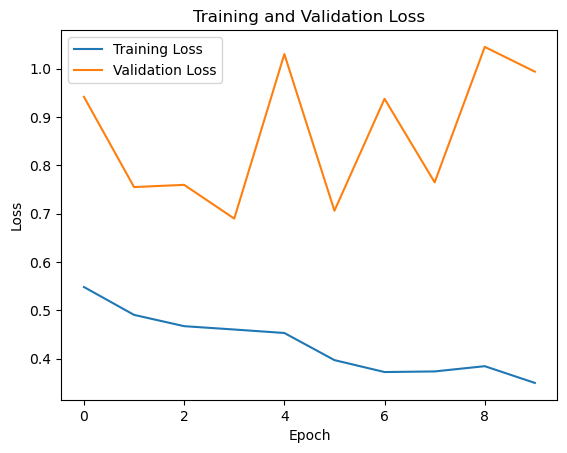

In [10]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows the picture of Training loss and validation loss.

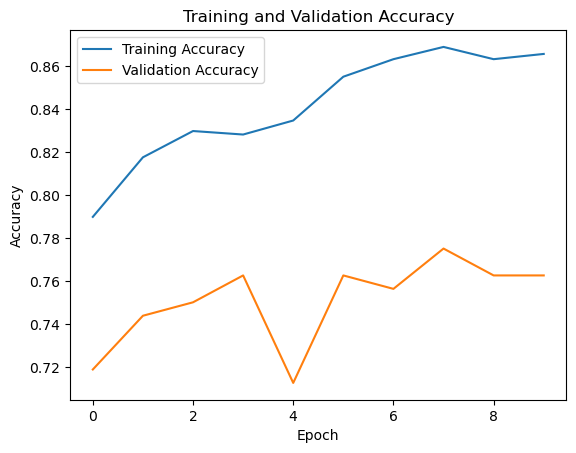

In [11]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph shows the picture of Training accuracy and Validation accuracy

In [12]:
# Evaluating the model
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print('Test accuracy:', test_acc)


Found 115 images belonging to 3 classes.
3/3 [==============================] - 11s 3s/step - loss: 0.2459 - accuracy: 0.9688
Test accuracy: 0.96875


At the end I have got an accuracy of 96% which is very good.